# Pearson Correlation

In [270]:
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')
#XRD Ensemble
#28 4NPQ
#18 4HFI

In [264]:
def plot_intra_pearson_data(data,note):
    data1 = data[(data.residue1 <= 311) & (data.residue2 <= 311)]
    data2 = data[(data.residue1 > 311) & (data.residue1 <= 311 *2) &(data.residue2 > 311) & (data.residue2 <= 311 *2)]
    data3 = data[(data.residue1 > 311 *2) & (data.residue1 <= 311 *3) &(data.residue2 > 311 *2) & (data.residue2 <= 311 *3)]
    data4 = data[(data.residue1 > 311 *3) & (data.residue1 <= 311 *4) &(data.residue2 > 311 *3) & (data.residue2 <= 311 *4)]
    data5 = data[(data.residue1 > 311 *4) & (data.residue1 <= 311 *5) &(data.residue2 > 311 *4) & (data.residue2 <= 311 *5)]
    data1 = data1.reset_index()
    data2 = data2.reset_index()
    data3 = data3.reset_index()
    data4 = data4.reset_index()
    data5 = data5.reset_index()
    data_intra = (data1 + data2 + data3 + data4 + data5) / 5

    data_intra[data_intra['pearson'] > 0]['pearson'] = np.max([data1[data_intra['pearson'] > 0].pearson,data2[data_intra['pearson'] > 0].pearson,data3[data_intra['pearson'] > 0].pearson,data4[data_intra['pearson'] > 0].pearson,data5[data_intra['pearson'] > 0].pearson],axis=0)
    data_intra[data_intra['pearson'] < 0]['pearson'] = np.min([data1[data_intra['pearson'] < 0].pearson,data2[data_intra['pearson'] < 0].pearson,data3[data_intra['pearson'] < 0].pearson,data4[data_intra['pearson'] < 0].pearson,data5[data_intra['pearson'] < 0].pearson],axis=0)
    data_intra = data_intra.drop('index',axis=1)
    data_intra.residue1 = data1.residue1.values
    data_intra.residue2 = data1.residue2.values
    data_intra = data_intra[(data_intra.pearson <= -0.2) | ((data_intra.pearson >= 0.2))]
    ax = plt.subplot()
    if not(data_intra.empty):

        data_intra.plot(kind='scatter',x='residue1',y='residue2', c=data_intra.pearson,colormap='PuOr',ax=ax,vmin=-0.6,vmax=0.6)
    ax.set_xlim(150,315)
    ax.set_ylim(150,315)
    ax.set_title(note + ' Intrasubunit Pearson correlation')
    plt.show()
#    plt.savefig('pearson_plots/' + note + '_intra_pearson.pdf')

In [265]:
def plot_inter_pearson_data(data,note):
    data1 = data[(data.residue1 > 311 * 0) & (data.residue1 <= 311 * 1) &(data.residue2 > 311 * 1) & (data.residue2 <= 311 *2)]
    data2 = data[(data.residue1 > 311 * 1) & (data.residue1 <= 311 * 2) &(data.residue2 > 311 * 2) & (data.residue2 <= 311 *3)]
    data3 = data[(data.residue1 > 311 * 2) & (data.residue1 <= 311 * 3) &(data.residue2 > 311 * 3) & (data.residue2 <= 311 *4)]
    data4 = data[(data.residue1 > 311 * 3) & (data.residue1 <= 311 * 4) &(data.residue2 > 311 * 4) & (data.residue2 <= 311 *5)]
    data5 = data[(data.residue1 > 311 * 4) & (data.residue1 <= 311 * 5) &(data.residue2 > 311 * 0) & (data.residue2 <= 311 * 1)]
    data1 = data1.reset_index()
    data2 = data2.reset_index()
    data3 = data3.reset_index()
    data4 = data4.reset_index()
    data5 = data5.reset_index()
    data_inter = (data1 + data2 + data3 + data4 + data5) / 5
    data_inter[data_inter['pearson'] > 0]['pearson'] = np.max([data1[data_inter['pearson'] > 0].pearson,data2[data_inter['pearson'] > 0].pearson,data3[data_inter['pearson'] > 0].pearson,data4[data_inter['pearson'] > 0].pearson,data5[data_inter['pearson'] > 0].pearson],axis=0)
    data_inter[data_inter['pearson'] < 0]['pearson'] = np.min([data1[data_inter['pearson'] < 0].pearson,data2[data_inter['pearson'] < 0].pearson,data3[data_inter['pearson'] < 0].pearson,data4[data_inter['pearson'] < 0].pearson,data5[data_inter['pearson'] < 0].pearson],axis=0)
    data_inter = data_inter.drop('index',axis=1)
    data_inter.residue1 = data1.residue1.values
    data_inter.residue2 = data1.residue2.values
    data_inter = data_inter[(data_inter.pearson <= -0.2) | ((data_inter.pearson >= 0.2))]
    #print(data_inter)
    ax = plt.subplot()
    if not(data_inter.empty):
        data_inter.plot(kind='scatter',x='residue1',y='residue2', c=data_inter.pearson,colormap='PuOr',ax=ax,vmin=-0.6,vmax=0.6)
    ax.set_xlim(150,315)
    ax.set_ylim(150 + 311,315 + 311)
    ax.set_title(note + ' Intersubunit Pearson correlation')
    plt.show()

#    plt.savefig('pearson_plots/' + note + '_inter_pearson.pdf')

In [266]:
def plot_pearson_data(data,traj_note):
    plot_intra_pearson_data(data,traj_note)
    plot_inter_pearson_data(data,traj_note)

In [267]:
def gather_replicates(traj_notes):
    pearson_avg = []
    for traj_note in traj_notes:
        data = pd.read_csv('/media/scottzhuang/data/MD/md_ensemble/' + traj_note + '/aggregate/pearson_data.dat',sep='\s+',header=None)
        data.columns = ['residue1','residue2','pearson']
        pearson_avg.append(data['pearson'].values)
    data['pearson'] = np.mean(pearson_avg,axis=0)
    return data

In [278]:
traj_notess = [['5NJY_pH70_md1','5NJY_pH70_md2','5NJY_pH70_md3'],['5NJY_F238L_pH70_md1',
                 '5NJY_F238L_pH70_md2','5NJY_F238L_pH70_md3'],['5NJY_I233T_pH70_md4',
                  '5NJY_I233T_pH70_md2','5NJY_I233T_pH70_md3'],['5NJY_F238LI233T_pH70_md1',
                  '5NJY_F238LI233T_pH70_md2','5NJY_F238LI233T_pH70_md3'],['5NJY_pH46_md1','5NJY_pH46_md2','5NJY_pH46_md3'],['5NJY_F238L_pH46_md1',
                 '5NJY_F238L_pH46_md2','5NJY_F238L_pH46_md3'],['5NJY_I233T_pH46_md1',
                  '5NJY_I233T_pH46_md2','5NJY_I233T_pH46_md3'],['5NJY_F238LI233T_pH46_md1',
                  '5NJY_F238LI233T_pH46_md2','5NJY_F238LI233T_pH46_md3'],['4HFI_pH46_md1','4HFI_pH46_md2','4HFI_pH46_md3'],['4HFI_F238L_pH46_md1',
                 '4HFI_F238L_pH46_md2','4HFI_F238L_pH46_md3'],['4HFI_I233T_pH46_md1',
                  '4HFI_I233T_pH46_md2','4HFI_I233T_pH46_md3'],['4HFI_F238LI233T_pH46_md1',
                  '4HFI_F238LI233T_pH46_md2','4HFI_F238LI233T_pH46_md3'],['4NPQ_pH70_md5','4NPQ_pH70_md6','4NPQ_pH70_md7'],['4NPQ_F238L_pH70_md3',
                 '4NPQ_F238L_pH70_md4','4NPQ_F238L_pH70_md5'],['4NPQ_I233T_pH70_md3',
                  '4NPQ_I233T_pH70_md4','4NPQ_I233T_pH70_md5'],['4NPQ_F238LI233T_pH70_md3',
                  '4NPQ_F238LI233T_pH70_md4','4NPQ_F238LI233T_pH70_md5']]

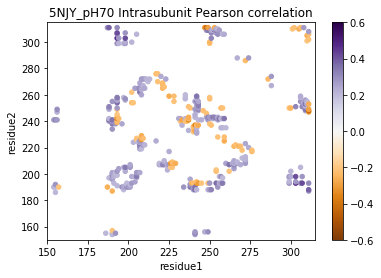

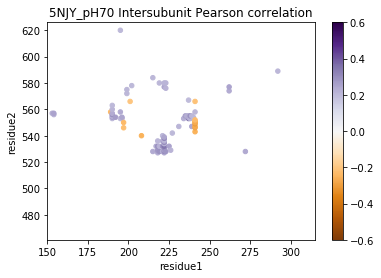

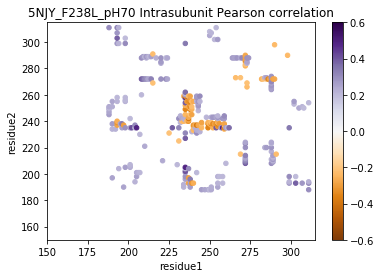

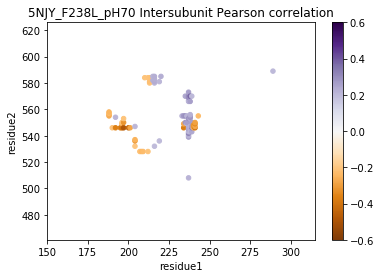

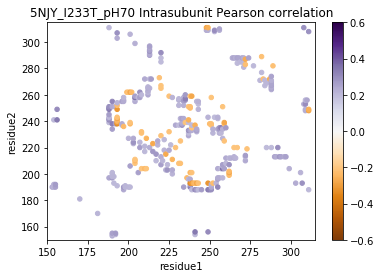

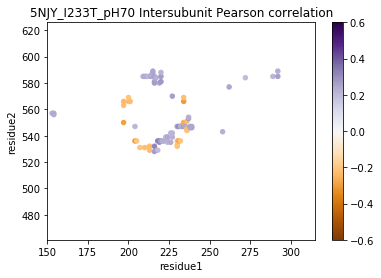

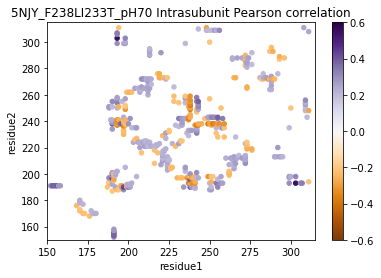

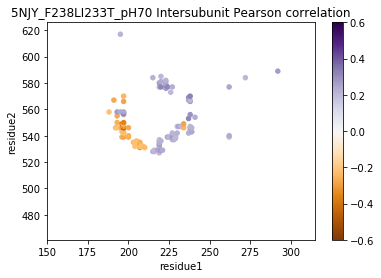

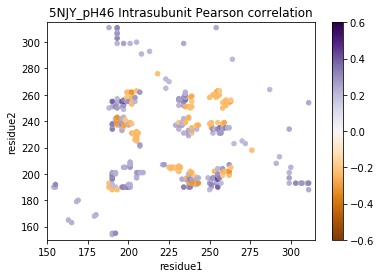

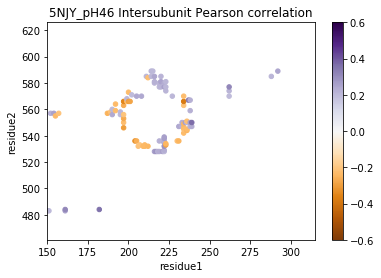

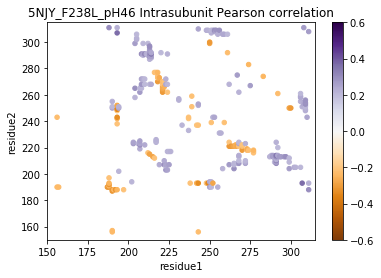

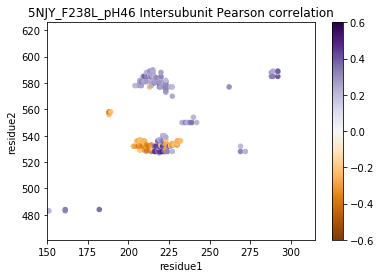

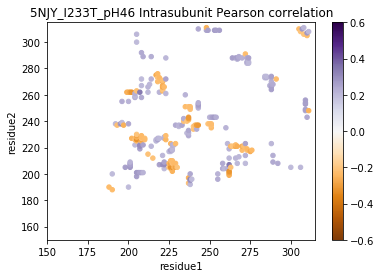

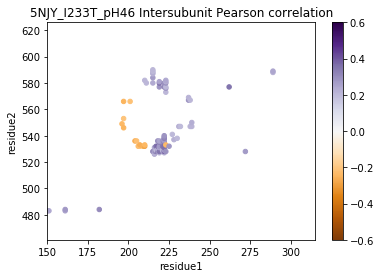

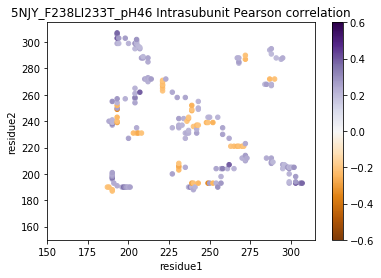

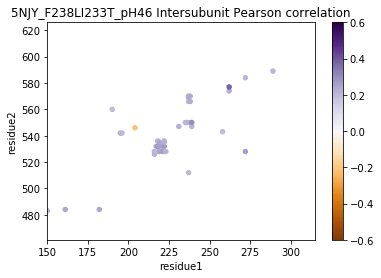

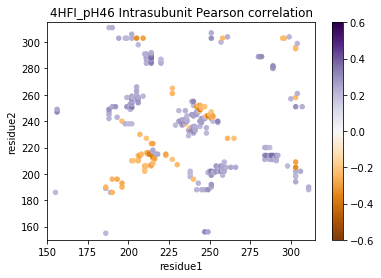

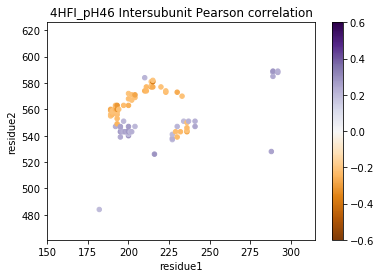

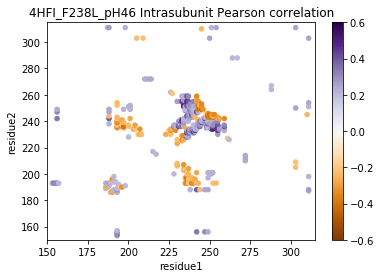

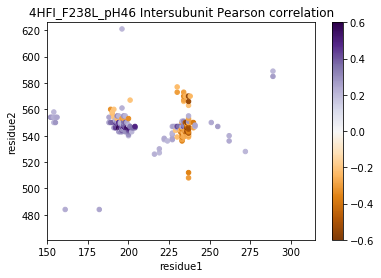

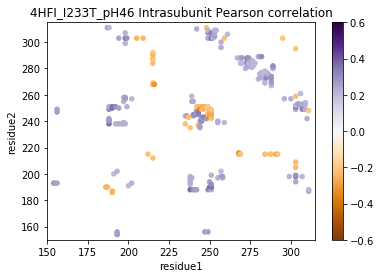

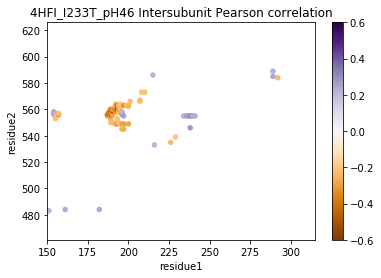

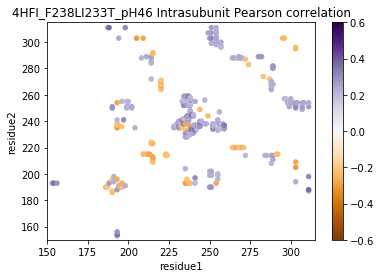

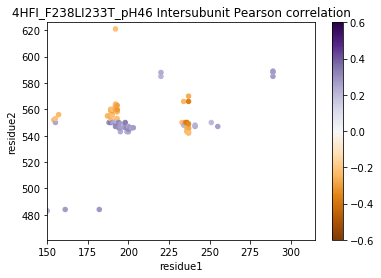

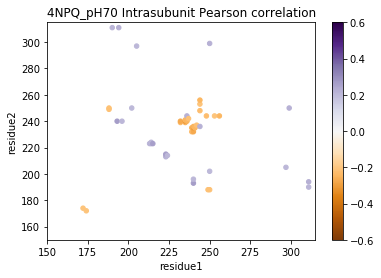

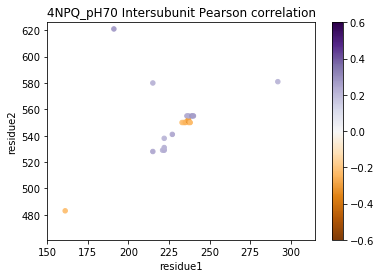

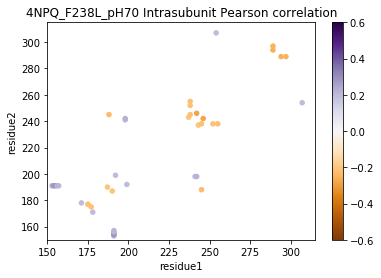

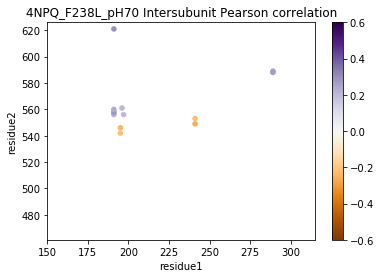

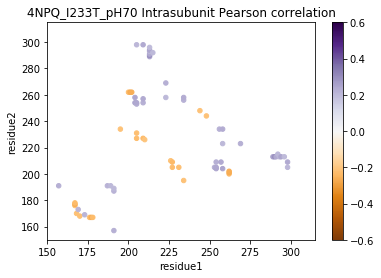

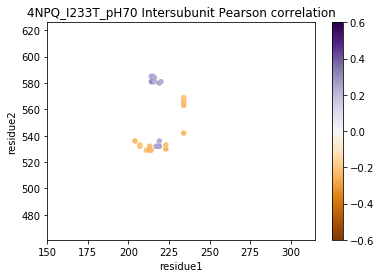

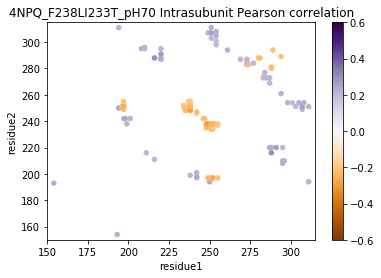

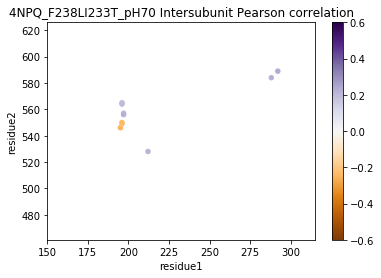

In [269]:
for traj_notes in traj_notess:
    plot_pearson_data(gather_replicates(traj_notes),traj_notes[0][:-4])

# Network Analysis

In [18]:
pearson_data_trans = np.zeros([1555,1555])

In [25]:
pearson_data_trans = pearson_data['pearson'].values.reshape([1555,1555])

In [31]:
np.savetxt('/media/scottzhuang/data/MD/md_ensemble/' + '4NPQ_pH70_md5' + '/aggregate/pearson_data_trans.dat',pearson_data_trans)

In [4]:
pearson_data['pearson'] = pearson_data['pearson'] / np.max(pearson_data['pearson'].values)

In [14]:
pearson_data = pearson_data[np.abs(pearson_data['pearson']) >= 0.8]

In [5]:
plotpearson = pearson_data[np.abs(pearson_data['pearson']) >= 0.8].values.T[0:2].T-1

In [6]:
ca_coor = md.load('/media/scottzhuang/data/MD/md_ensemble/' + '4NPQ_pH70_md5' + '/4NPQ_pH70_md5.ca.pdb').xyz[0].T

<IPython.core.display.Javascript object>


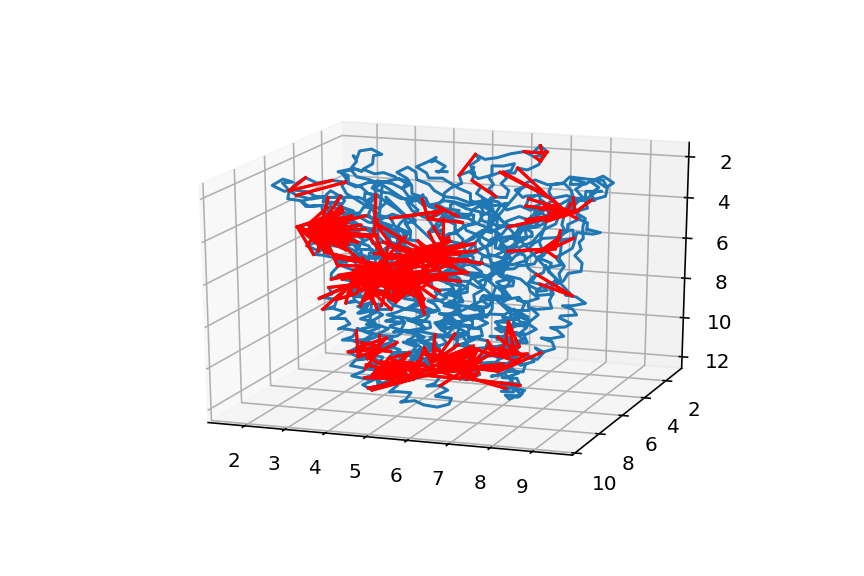

In [15]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(ca_coor[0],ca_coor[1],ca_coor[2])
for data in pearson_data.values:
    plotedge = data[0:2].astype(int).T - 1
    ax.plot3D(ca_coor[0][plotedge],ca_coor[1][plotedge],ca_coor[2][plotedge],c='r')

In [81]:
def transform_pearson_data(traj_notes):
    pearson_data_trans =[]
    for traj_note in traj_notes:
        pearson_data = pd.read_csv('/media/scottzhuang/data/MD/md_ensemble/' + traj_note + '/aggregate/pearson_data.dat',sep='\s+',header=None)
        pearson_data.columns = ['residue1','residue2','pearson']
        
        pearson_data_trans.append(pearson_data[(pearson_data['residue1'].isin(trans_ind)) & (pearson_data['residue2'].isin(trans_ind))]['pearson'].values.reshape([605,605]))
    pearson_data_mean = np.mean(pearson_data_trans,axis=0)
    #print(pearson_data_mean)
    np.savetxt('/media/scottzhuang/data/MD/md_ensemble/' + traj_notes[0] + '/' + traj_notes[0][:-4] + '_pearson_data_transmembrane_mean.dat',pearson_data_mean)        

In [82]:
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()
Parallel(n_jobs=num_cores)(delayed(transform_pearson_data)(traj_notes) for traj_notes in traj_notess)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# Pearson Network

In [290]:
import networkx as nx


In [297]:
trans_ind = np.asarray([np.arange(193,311),np.arange(504,622),np.arange(815,933),np.arange(1126,1244),np.arange(1437,1555)]).flatten() + 1

In [375]:
r = [1,2,3]
theta2 = np.arange(0,5) * 2 * np.pi / 5
theta1 = theta2 - np.pi / 7
theta3 = theta2 + np.pi / 7
theta4 = np.arange(0,5) * 2 * np.pi / 5

In [376]:
h2 = np.asarray([r[0] * np.cos(theta2),r[0] * np.sin(theta2)]).T
h4 = np.asarray([r[2] * np.cos(theta4),r[2] * np.sin(theta4)]).T
h3 = np.asarray([r[1] * np.cos(theta3),r[1] * np.sin(theta3)]).T
h1 = np.asarray([r[1] * np.cos(theta1),r[1] * np.sin(theta1)]).T

In [377]:
helix_1_ind = [np.arange(198,220) + 311 * 0 - 4,np.arange(198,220) + 311 * 1 - 4,np.arange(198,220) + 311 * 2 - 4,np.arange(198,220) + 311 * 3 - 4,np.arange(198,220) + 311 * 4 - 4]
helix_2_ind = [np.arange(220,250) + 311 * 0 - 4,np.arange(220,250) + 311 * 1 - 4,np.arange(220,250) + 311 * 2 - 4,np.arange(220,250) + 311 * 3 - 4,np.arange(220,250) + 311 * 4 - 4]
helix_3_ind = [np.arange(250,282) + 311 * 0 - 4,np.arange(250,282) + 311 * 1 - 4,np.arange(250,282) + 311 * 2 - 4,np.arange(250,282) + 311 * 3 - 4,np.arange(250,282) + 311 * 4 - 4]
helix_4_ind = [np.arange(282,316) + 311 * 0 - 4,np.arange(282,316) + 311 * 1 - 4,np.arange(282,316) + 311 * 2 - 4,np.arange(282,316) + 311 * 3 - 4,np.arange(282,316) + 311 * 4 - 4]

In [378]:
pos_helix = dict()
for helix_1_chain, coordinate in zip(helix_1_ind,h1):
    for residue in helix_1_chain:
        pos_helix.update({residue:(coordinate[0],coordinate[1])})
for helix_2_chain, coordinate in zip(helix_2_ind,h2):
    for residue in helix_2_chain:
        pos_helix.update({residue:(coordinate[0],coordinate[1])})
for helix_3_chain, coordinate in zip(helix_3_ind,h3):
    for residue in helix_3_chain:
        pos_helix.update({residue:(coordinate[0],coordinate[1])})
for helix_4_chain, coordinate in zip(helix_4_ind,h4):
    for residue in helix_4_chain:
        pos_helix.update({residue:(coordinate[0],coordinate[1])})

In [379]:
def gather_replicates(traj_notes):
    pearson_avg = []
    for traj_note in traj_notes:
        data = pd.read_csv('/media/scottzhuang/data/MD/md_ensemble/' + traj_note + '/aggregate/pearson_data.dat',sep='\s+',header=None)
        data.columns = ['residue1','residue2','pearson']
        pearson_avg.append(data['pearson'].values)
    data['pearson'] = np.mean(pearson_avg,axis=0)
    return data[(data.pearson >= 0.5) | (data.pearson <= -0.5)],traj_notes[0][:-4]

In [380]:
def create_pearson_network(traj_notes, location = '/media/scottzhuang/data/MD/', skip=10):
    contact_map,note = gather_replicates(traj_notes)
    print('In correlation network of ' + note)
    pearson_network = nx.Graph()

    pearson_network.add_nodes_from(np.arange(1,1556))
    pos_spring = nx.spring_layout(pearson_network)
    pos_circular = nx.circular_layout(pearson_network)
    for index,row in contact_map.iterrows():
        if (row['pearson'] >= 0.5) & (row['residue1'] in trans_ind) & (row['residue2'] in trans_ind):
            pearson_network.add_edge(row['residue1'],row['residue2'],weight=row['pearson'])
        elif (row['pearson'] <= -0.5) & (row['residue1'] in trans_ind) & (row['residue2'] in trans_ind):
            pearson_network.add_edge(row['residue1'],row['residue2'],weight=row['pearson'])

    print('Number of all edges', pearson_network.number_of_edges())
    pearson_network = max(nx.connected_component_subgraphs(pearson_network), key=len)
    print('Number of most extensive network edges', pearson_network.number_of_edges())

    resid233 = np.arange(0,5) * 311 + 233 - 4
    resid238 = np.arange(0,5) * 311 + 238 - 4 
    
    fig = plt.figure() 
    ax1 = fig.add_subplot(1,2,1,aspect='equal') 
    weights = [pearson_network[u][v]['weight'] * 3 for u,v in pearson_network.edges]
    options = {'node_color': 'cyan','node_size': 10,'width': weights,'edge_color':weights,'font_size':1,'edge_cmap':plt.cm.bwr,'vmax':1,'vmin':-1}

    nx.draw(pearson_network,pos_helix, with_labels=False,ax=ax1,**options)
    for residue in resid233:
        if residue in list(pearson_network.nodes):
            nx.draw_networkx_nodes(pearson_network, pos_helix, node_size=20, nodelist=[residue],node_color='red')
    for residue in resid238:
        if residue in list(pearson_network.nodes):
            nx.draw_networkx_nodes(pearson_network, pos_helix, node_size=20, nodelist=[residue],node_color='green')
    
    plt.scatter(h1.T[0],h1.T[1],color='black',alpha=0.5)
    plt.scatter(h2.T[0],h2.T[1],color='black',alpha=0.5)
    plt.scatter(h3.T[0],h3.T[1],color='black',alpha=0.5)
    plt.scatter(h4.T[0],h4.T[1],color='black',alpha=0.5)

    circle1 = plt.Circle((0, 0), 1, color='black', fill=False,alpha=0.5)    
    circle2 = plt.Circle((0, 0), 2, color='black', fill=False,alpha=0.5)    
    circle3 = plt.Circle((0, 0), 3, color='black', fill=False,alpha=0.5) 
    plt.gca().add_patch(circle1)
    plt.gca().add_patch(circle2)
    plt.gca().add_patch(circle3)
    ax1.set_xlim(-3,3)
    ax1.set_ylim(-3,3)
    ax2 = fig.add_subplot(1,2,2,aspect='equal')
    nx.draw(pearson_network,pos_circular, with_labels=False,ax=ax2,**options)

    ax2.set_xlim(-1,1)
    ax2.set_ylim(-1,1)
    for residue in resid233:
        if residue in list(pearson_network.nodes):
            nx.draw_networkx_nodes(pearson_network, pos_circular, node_size=20, nodelist=[residue],node_color='red',ax=ax2)
    for residue in resid238:
        if residue in list(pearson_network.nodes):
            nx.draw_networkx_nodes(pearson_network, pos_circular, node_size=20, nodelist=[residue],node_color='green',ax=ax2)
    circle1 = plt.Circle((0, 0), 1, color='black', fill=False,alpha=0.5)    
    plt.gca().add_patch(circle1)
    sm = plt.cm.ScalarMappable(cmap=plt.cm.bwr,norm=plt.Normalize(vmin=-1, vmax=1))
    sm._A = []

    plt.colorbar(sm)
    plt.axis('off')
    plt.savefig('pearson_plots/pearson' + note + 'network.pdf')
    plt.show()
    pathlengths = []
    
    for v in pearson_network.nodes():
        spl = dict(nx.single_source_shortest_path_length(pearson_network, v))
        for p in spl:
            pathlengths.append(spl[p])
    
    print('')
    print("average shortest path length %s" % (sum(pathlengths) / len(pathlengths)))
    print('')
#   print("length #paths")
    dist = {}
    for p in pathlengths:
        if p in dist:
            dist[p] += 1
        else:
            dist[p] = 1
    verts = dist.keys()
    #for d in sorted(verts):
    #    print('%s %d' % (d, dist[d]))
    
    print("radius: %d" % nx.radius(pearson_network))
    print("diameter: %d" % nx.diameter(pearson_network))
    #print("eccentricity: %s" % nx.eccentricity(pearson_network))
    print("center: %s" % nx.center(pearson_network))
    #print("periphery: %s" % nx.periphery(pearson_network))
    print("density: %s" % nx.density(pearson_network))
    print(" ")



In correlation network of 5NJY_pH70
Number of all edges 142
Number of most extensive network edges 73


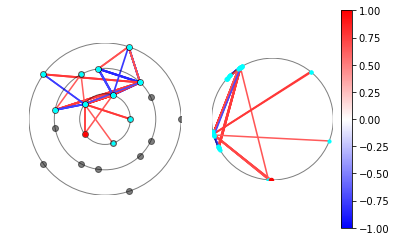


average shortest path length 3.3180737217598097

radius: 4
diameter: 7
center: [532.0, 840.0, 843.0, 848.0, 894.0]
density: 0.044162129461584994
 
In correlation network of 5NJY_F238L_pH70
Number of all edges 133
Number of most extensive network edges 44


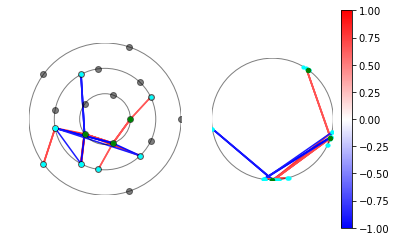


average shortest path length 4.849173553719008

radius: 6
diameter: 12
center: [818.0]
density: 0.046511627906976744
 
In correlation network of 5NJY_I233T_pH70
Number of all edges 208
Number of most extensive network edges 135


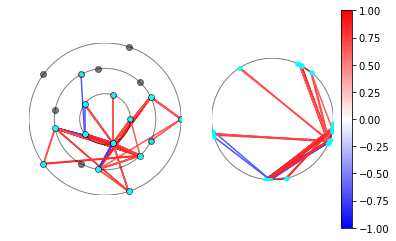


average shortest path length 3.9496296296296296

radius: 5
diameter: 10
center: [1458.0, 1460.0, 1464.0]
density: 0.033707865168539325
 
In correlation network of 5NJY_F238LI233T_pH70
Number of all edges 315
Number of most extensive network edges 234


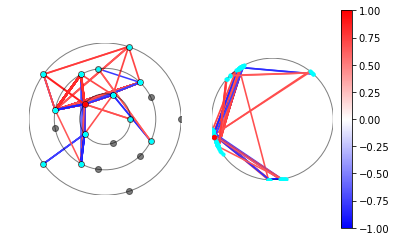


average shortest path length 3.751570247933884

radius: 5
diameter: 10
center: [844.0, 845.0]
density: 0.0390325271059216
 
In correlation network of 5NJY_pH46
Number of all edges 35
Number of most extensive network edges 30


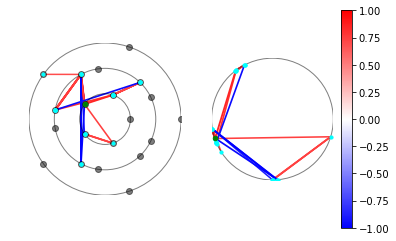


average shortest path length 3.423469387755102

radius: 4
diameter: 7
center: [877.0, 819.0]
density: 0.07936507936507936
 
In correlation network of 5NJY_F238L_pH46
Number of all edges 276
Number of most extensive network edges 258


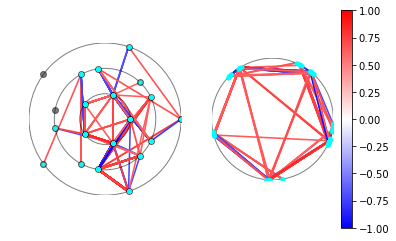


average shortest path length 3.5302734375

radius: 4
diameter: 8
center: [1155.0]
density: 0.03174212598425197
 
In correlation network of 5NJY_I233T_pH46
Number of all edges 41
Number of most extensive network edges 9


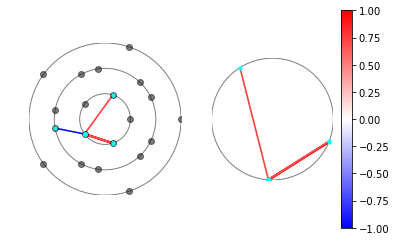


average shortest path length 2.0

radius: 2
diameter: 4
center: [1461.0]
density: 0.2
 
In correlation network of 5NJY_F238LI233T_pH46
Number of all edges 36
Number of most extensive network edges 14


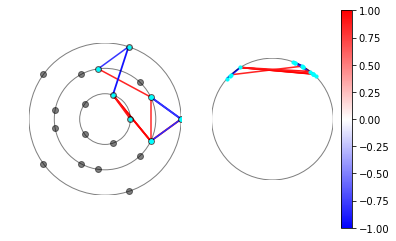


average shortest path length 2.88

radius: 3
diameter: 6
center: [528.0]
density: 0.13333333333333333
 
In correlation network of 4HFI_pH46
Number of all edges 252
Number of most extensive network edges 216


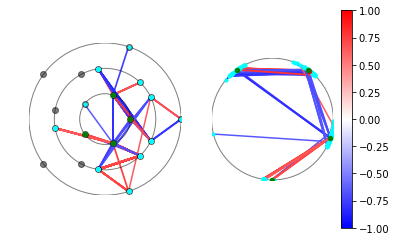


average shortest path length 6.408533481419779

radius: 10
diameter: 19
center: [1498.0, 1444.0, 1448.0, 1478.0, 1489.0, 1502.0, 1503.0, 1483.0]
density: 0.020128599384959464
 
In correlation network of 4HFI_F238L_pH46
Number of all edges 325
Number of most extensive network edges 320


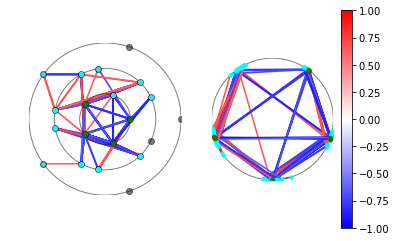


average shortest path length 4.643827389973977

radius: 6
diameter: 12
center: [1166.0]
density: 0.0184003220056351
 
In correlation network of 4HFI_I233T_pH46
Number of all edges 158
Number of most extensive network edges 92


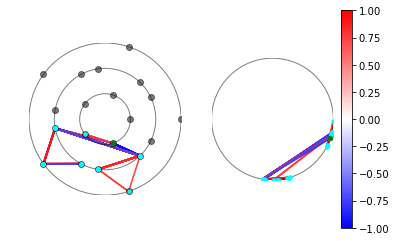


average shortest path length 3.407544378698225

radius: 5
diameter: 9
center: [1236.0, 1127, 1132.0]
density: 0.0693815987933635
 
In correlation network of 4HFI_F238LI233T_pH46
Number of all edges 156
Number of most extensive network edges 142


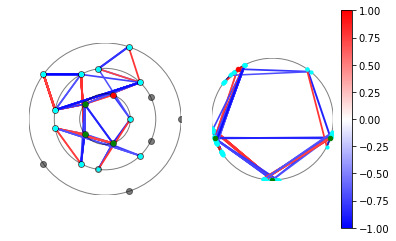


average shortest path length 4.671211752292834

radius: 6
diameter: 11
center: [856.0, 877.0, 505.0, 506.0, 508.0, 511.0]
density: 0.02325962325962326
 
In correlation network of 4NPQ_pH70
Number of all edges 230
Number of most extensive network edges 204


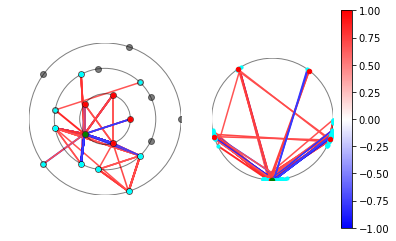


average shortest path length 6.338856625286376

radius: 10
diameter: 20
center: [1482.0]
density: 0.021897810218978103
 
In correlation network of 4NPQ_F238L_pH70
Number of all edges 16
Number of most extensive network edges 7


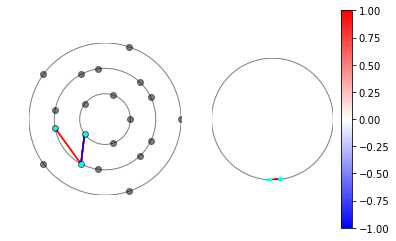


average shortest path length 2.21875

radius: 3
diameter: 5
center: [1147, 1198.0]
density: 0.25
 
In correlation network of 4NPQ_I233T_pH70
Number of all edges 40
Number of most extensive network edges 21


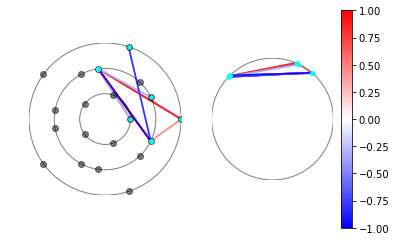


average shortest path length 2.985

radius: 4
diameter: 7
center: [583.0, 585.0, 214.0]
density: 0.11052631578947368
 
In correlation network of 4NPQ_F238LI233T_pH70
Number of all edges 111
Number of most extensive network edges 58


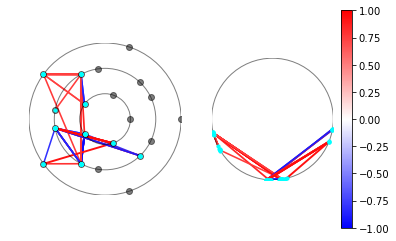


average shortest path length 4.2043431826272695

radius: 4
diameter: 8
center: [1207.0]
density: 0.0420899854862119
 


In [381]:
for traj_notes in traj_notess:
    create_pearson_network(traj_notes)